# Visualizar e salvar figuras do Teste 1

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
from time import time
from pathlib import Path

## Configurações para salvar as figuras

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {
    "figure.figsize":  [3.4, 2.1],
    "axes.labelsize":  8,
    "font.size":       8,
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "axes.axisbelow":  True,
    "text.usetex":     True,
    "font.family":     "serif",
    "font.serif":      ["Times"]
}
plt.rcParams.update(params)

## Definição de funções

In [3]:
def printarMaisMetricas(dictResultado):    
    print("acuraciaMedia:           ", dictResultado["acuraciaMedia"])
    print("acuraciaDesvio:          ", dictResultado["acuraciaDesvio"])
    print("precisaoMedia:           ", dictResultado["precisaoMedia"])
    print("precisaoDesvio:          ", dictResultado["precisaoDesvio"])
    print("revocacaoMedia:          ", dictResultado["revocacaoMedia"])
    print("revocacaoDesvio:         ", dictResultado["revocacaoDesvio"])
    print("tempoProcessamentoMedio: ", dictResultado["tempoProcessamentoMedio"])
    print("tempoProcessamentoDesvio:", dictResultado["tempoProcessamentoDesvio"])
    print("somaMatrizesConfusao:    ", dictResultado["somaMatrizesConfusao"])

In [7]:
def printarProbabilidadeDeteccao(dictKey, dictResultado, dirSalvarFig):
    
    # CAMINHO PARA SALVAR A FIGURA
    nomeFig = "test_1_" + dictKey + "_"  + "_".join(dictResultado["featuresSelecionadas"]) + "_" + str(dictResultado["qtdUsuarios"]) + "_users_" + str(dictResultado["qtdAntenas"]) + "_antennas_" + str(dictResultado["qtdSimbolos"]) + "_symbols"
    pathSalvarFig = dirSalvarFig.resolve().joinpath(nomeFig + ".pdf")
    print("Figura salva em: " + str(pathSalvarFig))
    printarMaisMetricas(dictResultado)
    
    # RESGATANDO ARRAYS QUE VAO FAZER O PLOT
    rangePotEspiao                    = dictResultado["rangePotEspiao"]
    rangeSNRs                         = dictResultado["rangeSNRs"]
    matrizProbabilidadeDeteccaoMedia  = dictResultado["matrizProbabilidadeDeteccaoMedia"]
    matrizProbabilidadeDeteccaoDesvio = dictResultado["matrizProbabilidadeDeteccaoDesvio"]
    
    # MONTANDO A FIGURA DE PROBABILIDADES DE DETECCAO PARA CADA POTENCIA DE ESPIAO E CADA SNR
    for i in range(len(rangePotEspiao)):
        plt.errorbar(rangeSNRs, matrizProbabilidadeDeteccaoMedia[i], yerr=matrizProbabilidadeDeteccaoDesvio[i], label="$P_{e} = "+str(rangePotEspiao[i])+"$")
    plt.xlabel("SNR (dB)")
    plt.ylabel("$P_{d}$")
    plt.grid(alpha=0.5)
    plt.legend()
    plt.savefig(pathSalvarFig, bbox_inches="tight")
    plt.show()

## Abrindo o JSON de resultados

In [8]:
dirResultados            = Path("../../results/test_1/")
arquivoUltimosResultados = sorted(dirResultados.glob("detection_probability_*.json"))[-1]
dictResultados           = json.load(open(arquivoUltimosResultados))

## Printando

DECISIONTREECLASSIFIER_1623291102824103:
Figura salva em: C:\Users\PedroIvo\Documents\Github-Projects\Pilot-Contamination-Detection-Massive-MIMO\results\test_1\test_1_DecisionTreeClassifier_1623291102824103_E_64_users_256_antennas_300_symbols.pdf
acuraciaMedia:            0.9995609756097561
acuraciaDesvio:           0.00018251987252555828
precisaoMedia:            0.9995140604972189
precisaoDesvio:           0.00030679036483219455
revocacaoMedia:           0.9996098208590144
revocacaoDesvio:          0.0002955610901628981
tempoProcessamentoMedio:  9.057645681427745e-05
tempoProcessamentoDesvio: 4.725631110097743e-06
somaMatrizesConfusao:     [[20490, 10], [8, 20492]]


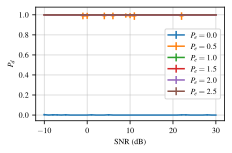



HASSAN_16232911065627248:
Figura salva em: C:\Users\PedroIvo\Documents\Github-Projects\Pilot-Contamination-Detection-Massive-MIMO\results\test_1\test_1_Hassan_16232911065627248_E_eta_64_users_256_antennas_300_symbols.pdf
acuraciaMedia:            0.856341463414634
acuraciaDesvio:           0.0049650773268290664
precisaoMedia:            1.0
precisaoDesvio:           0.0
revocacaoMedia:           0.7127402486041579
revocacaoDesvio:          0.007225369723161201
tempoProcessamentoMedio:  1.1962698727119258e-05
tempoProcessamentoDesvio: 5.057356226841077e-07
somaMatrizesConfusao:     [[20500, 0], [5890, 14610]]


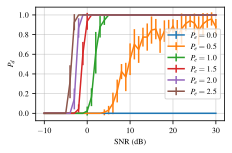

In [9]:
printarTestes = (
    ("tree",   ["E"]),
    ("hassan", ["E", "eta"]),
)

for tecnicaDeteccao, featuresSelecionadas in printarTestes:
    for key, values in dictResultados.items():
        if tecnicaDeteccao.upper() in key.upper() and featuresSelecionadas == values["featuresSelecionadas"]:
            print(key.upper() + ":")
            printarProbabilidadeDeteccao(key, values, dirResultados)
            print("\n")